In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytides.tide import Tide
from datetime import datetime

Here, the data from the Nain tide gauge is loaded:

In [2]:
Nain_gauge = pd.read_csv('h833a.csv', parse_dates=True)
Nain_gauge.head()

,year,month,day,hour,height
0,1963,10,17,5,530
1,1963,10,17,6,650
2,1963,10,17,7,970
3,1963,10,17,8,1380
4,1963,10,17,9,1870


Here, the missing values are replaced with NaN:

In [3]:
Nain_gauge = Nain_gauge.replace(-32767, np.NaN)

The mean observed water level is calculated. That value is then subtracted from each observation of water level in the dataset:

In [4]:
demeaned = Nain_gauge['height'] - Nain_gauge['height'].mean()
Nain_gauge['height_corr'] = demeaned

This is a list of index values that correspond to the beginning of a continuous year-long record of water level observations, and the row number of the measurement that occurs exactly one year later:

[(16896, 25656),
 (29856, 38616),
 (60984, 69744),
 (71352, 80112),
 (332821, 341581),
 (411838, 420598),
 (446492, 455252),
 (455663, 464423),
 (464424, 473184),
 (473185, 481945)]

Here, the **third** pair of index values is used to slice the Nain gauge DataFrame into a one-year long record:

In [5]:
year70 = Nain_gauge.loc[60984:69744, :].reset_index(drop=True)

That data is visualized:

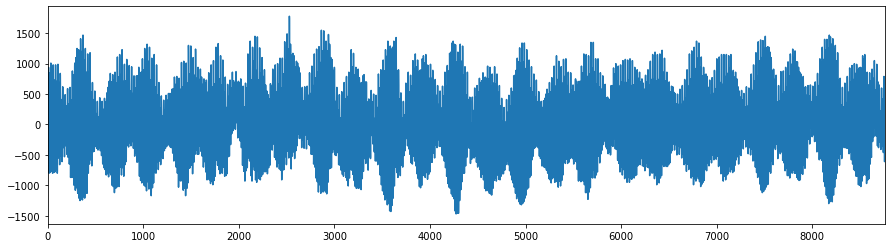

In [6]:
ax =  year70['height_corr'].plot(figsize=(15,4))

The first measurement in that record is defined as a datetime object called "t0":

In [7]:
t0 = datetime(year70.loc[0,'year'], year70.loc[0,'month'], year70.loc[0,'day'], year70.loc[0,'hour'])
t0

datetime.datetime(1970, 10, 1, 5, 0)

A one-year-long array of hours is generated:

In [8]:
hours = 0.1*np.arange(365 * 24)

An array of datetime objects, beginning at "t0" and of equal length to one-year's worth of hours, is generated:

In [9]:
times = Tide._times(t0, hours)
len(times)

8760

The tidal decomposition function from pytides is applied to the year of water level observations:

In [10]:
tide_70 = Tide.decompose(year70['height_corr'], times)

An array of water level over one year is generated for the data:

In [11]:
tide_model = tide_70.at(times)

The tidal model is plotted:

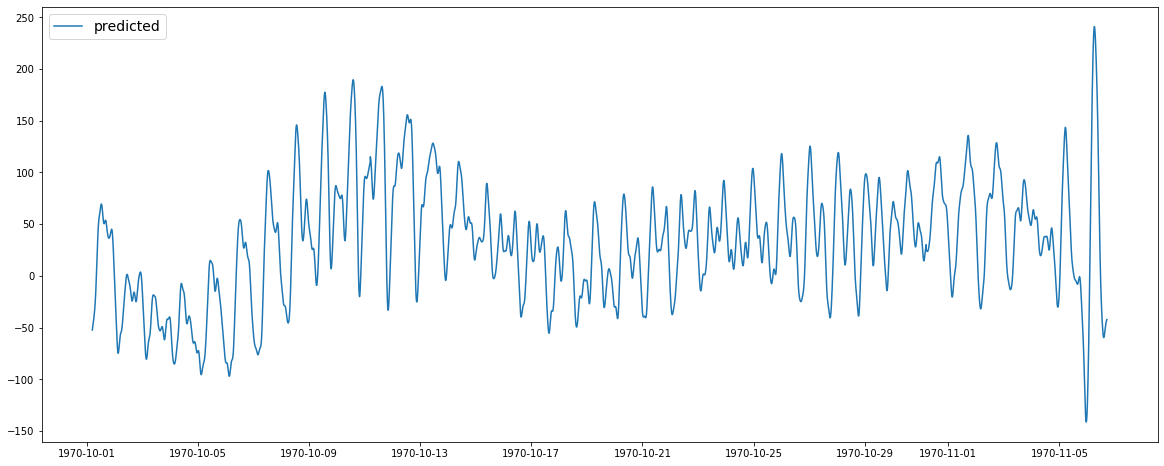

In [12]:
fig, ax = plt.subplots(figsize=(20,8))

# plot the model
ax.plot(times, tide_model, label='predicted')

ax.legend(fontsize=14)

plt.show()

The tidal consituents calculated by pytides are added to a new DataFrame:

In [13]:
constituent = [c.name for c in tide_70.model['constituent']]

In [14]:
year70_components = pd.DataFrame(tide_70.model, index=constituent).drop('constituent', axis=1)

The tidal amplitude is converted to meters and added to the DataFrame:

In [15]:
year70_components['amplitude (m)'] = year70_components['amplitude']/1000

The largest 10 tidal components are displayed:

In [16]:
year70_components.sort_values('amplitude', ascending=False).head(10)

,amplitude,phase,amplitude (m)
S1,2406.595980,355.001476,2.406596
P1,1273.613481,56.550881,1.273613
K1,1038.990962,297.534775,1.038991
R2,929.556894,155.500750,0.929557
T2,552.388442,336.128835,0.552388
K2,438.991740,303.519425,0.438992
L2,427.881403,281.587013,0.427881
S2,348.130885,132.062508,0.348131
lambda2,304.397105,338.677437,0.304397
N2,163.679268,280.784892,0.163679


In [17]:
year70_components.to_csv('ComponentsAmplitude_1970.csv')